# Decision Boundaries Simple Neural Network

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_s_curve
import copy
import seaborn as sns
from sklearn.datasets import make_circles, make_gaussian_quantiles, make_classification, make_moons

random_state = 42
np.random.seed(random_state)

In [2]:
from neural_network.neural_network import SimpleNeuralNetwork, NeuralNetwork

In [3]:
%matplotlib inline

In [4]:
plt.rcParams.update({'font.size': 14, 'figure.figsize': (20,9)})

In [5]:
# function adapted from
# https://github.com/Bennri/view-on-machine-learning/blob/master/visualization-decision-surfaces/helpers.py
def create_plot(data, labels, clf, title='Your Title',
                legend_loc='upper left', colormap='YlGnBu',
                alpha=0.6, figur_size=(20, 15), steps=0.1, plot_data_points=True,
                label_feature_1='feature 1', label_feature_2='feature 2'):
    x = data[:,0]
    y = data[:,1]
    classes = np.unique(labels)
    n_classes = len(np.unique(labels))

    labels_axis = ['class ' + str(c) for c in classes.astype(np.int)]

    cm = plt.cm.get_cmap(colormap, n_classes)
    x_min = x.min() - 2
    x_max = x.max() + 2
    y_min = y.min() - 2
    y_max = y.max() + 2
    XX, YY = np.meshgrid(np.arange(x_min, x_max, steps), np.arange(y_min, y_max, steps))
    # prediction for each point in the meshgrid
    Z = clf.predict(np.c_[XX.ravel(), YY.ravel()])
    # reshape for the grid
    Z = Z.reshape(XX.shape)

    plt.figure(figsize=figur_size)
    # contour plot
    plt.contourf(XX, YY, Z, cmap=plt.cm.get_cmap(colormap), alpha=alpha)
    if plot_data_points:
        for i in range(n_classes):
            curr_class_data = data[np.where(labels==classes[i])[0].tolist()]
            plt.scatter(curr_class_data[:,0], curr_class_data[:,1], c=np.array([cm(i)]), label=labels_axis[i])
        plt.legend()
    plt.xlabel(label_feature_1)
    plt.ylabel(label_feature_2)
    plt.title(title)
    plt.show()

### Generate Data

In [6]:
mean_1 = [4, 2]
cov_1 = [[3, 0], [0, 3]]

mean_2 = [-4, -2]
cov_2 = [[3, 0], [0, 3]]

n_samples = 100

samples_class_1 = np.random.multivariate_normal(mean=mean_1, cov=cov_1, size=n_samples)
samples_class_2 = np.random.multivariate_normal(mean=mean_2, cov=cov_2, size=n_samples)

data = np.vstack((samples_class_1, samples_class_2))

labels_1 = np.array([1] * n_samples)
labels_2 = np.array([0] * n_samples)

labels = np.hstack((labels_1, labels_2))

### Plot the data

In [7]:
labels_0_idx = np.where(labels == 0)[0]
labels_1_idx = np.where(labels == 1)[0]

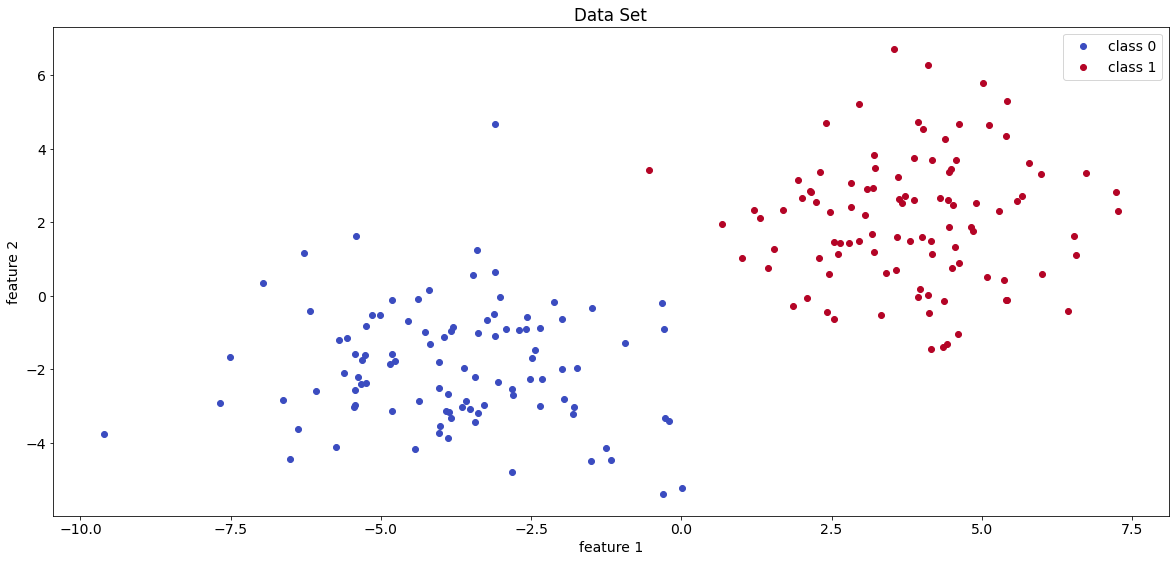

In [8]:
cm = plt.cm.get_cmap('coolwarm', len(np.unique(labels)))

plt.scatter(data[labels_0_idx, 0], data[labels_0_idx, 1], label='class 0', c=np.array([cm(0)]))
plt.scatter(data[labels_1_idx, 0], data[labels_1_idx, 1], label='class 1', c=np.array([cm(1)]))
plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.legend()
plt.title("Data Set")
plt.show()

In [9]:
p = np.random.permutation(len(labels))
data = data[p, :]
labels = labels[p]

In [10]:
net = SimpleNeuralNetwork(data, labels)

In [11]:
iterations = 50
net.fit(iterations=iterations, print_error=False)

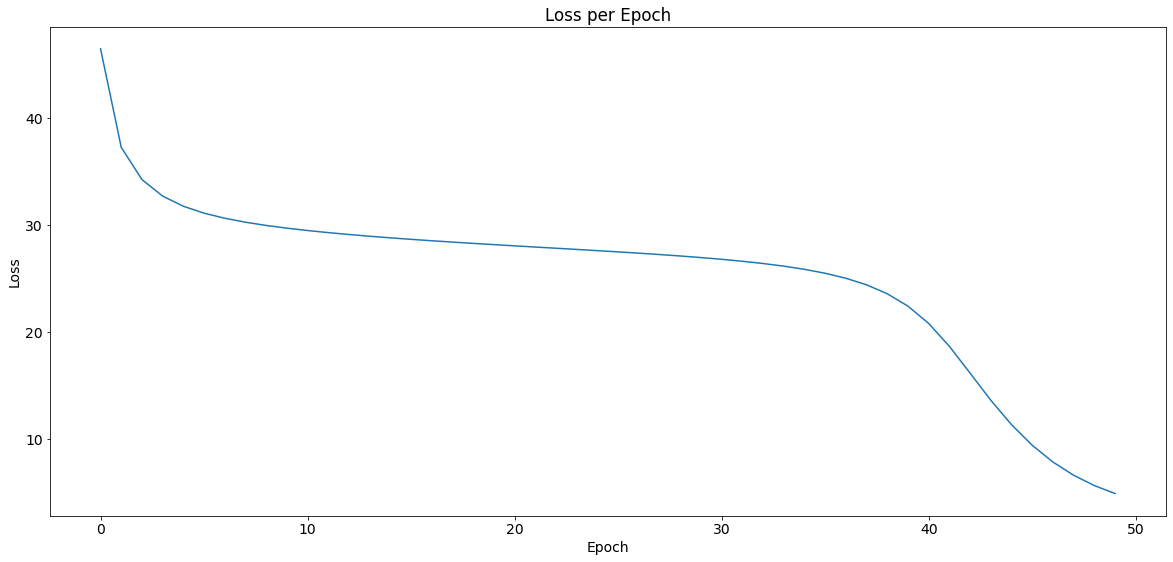

In [12]:
plt.plot(range(0, iterations), net.loss)
plt.title('Loss per Epoch')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

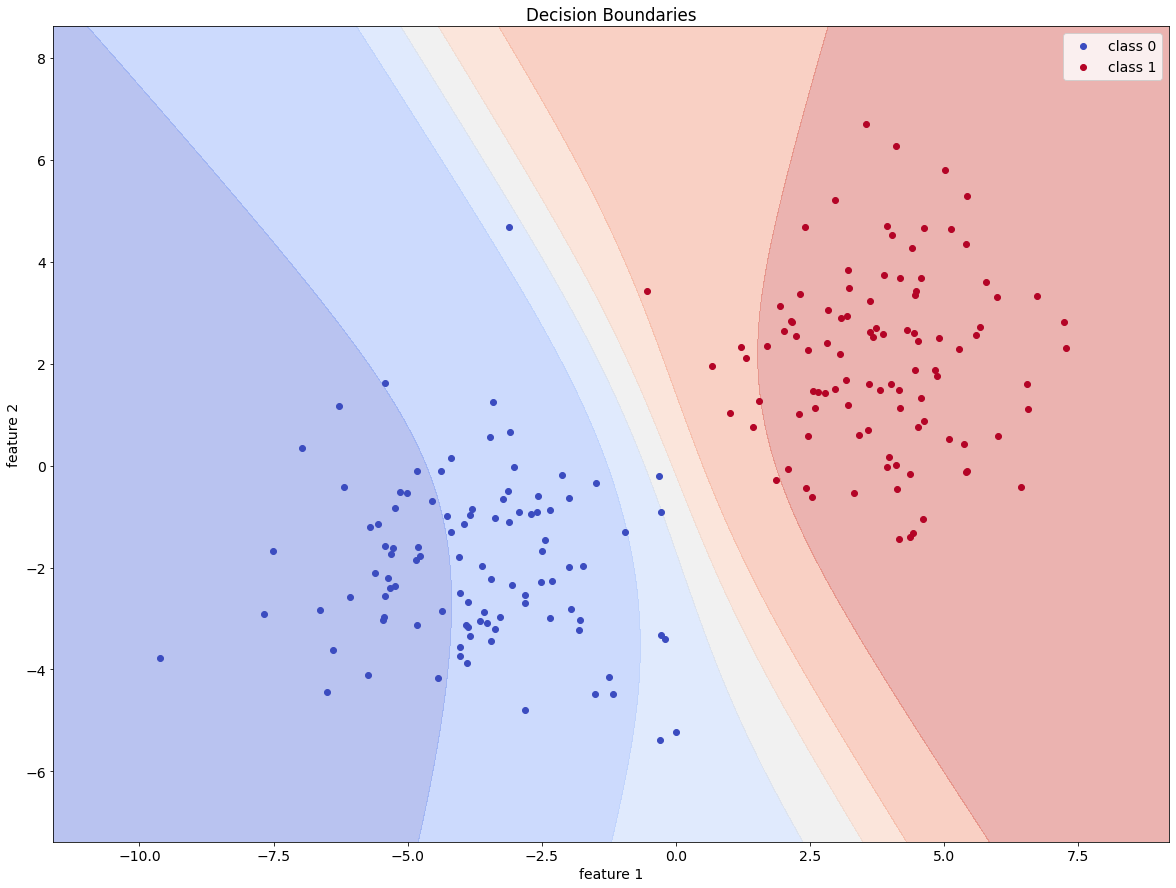

In [13]:
create_plot(data, labels, net, title='Decision Boundaries', alpha=0.4, colormap='coolwarm')

In [14]:
net_deep = NeuralNetwork(data, labels, lr=0.01)

In [15]:
iterations = 50
net_deep.fit(iterations=iterations, print_error=False)

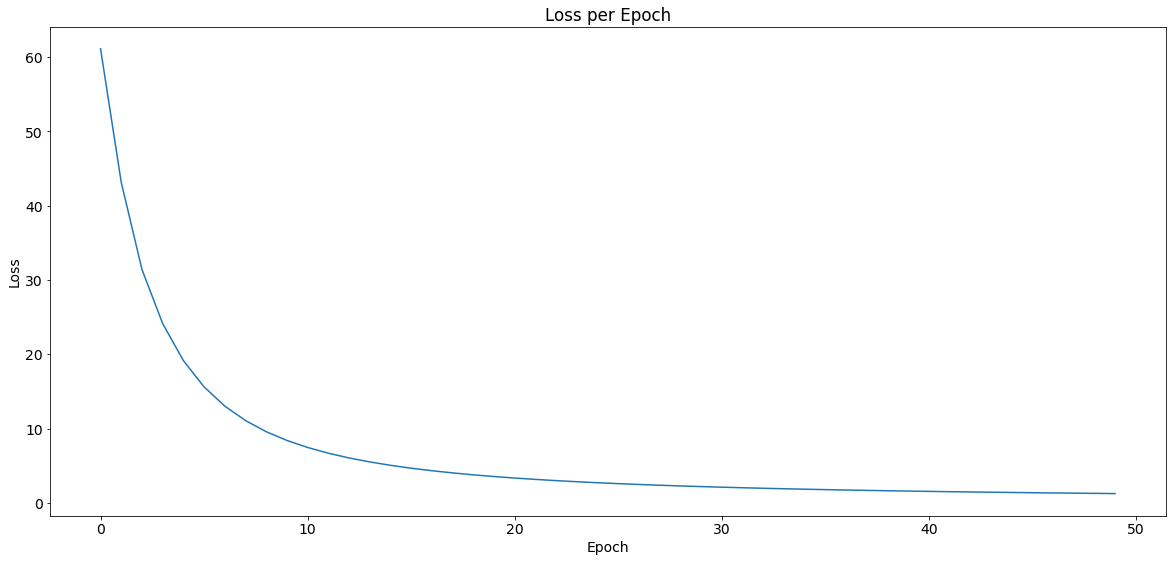

In [16]:
plt.plot(range(0, iterations), net_deep.loss)
plt.title('Loss per Epoch')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

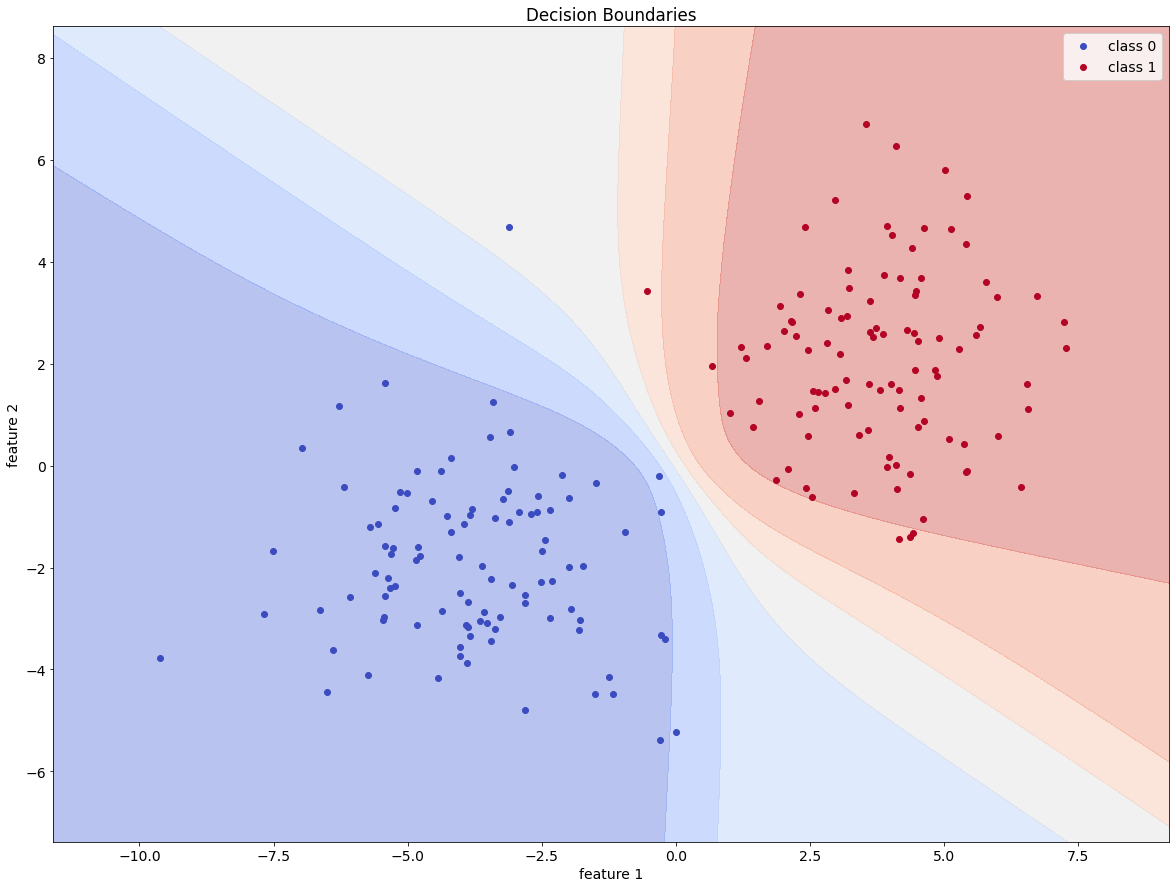

In [17]:
create_plot(data, labels, net_deep, title='Decision Boundaries', alpha=0.4, colormap='coolwarm')

In [18]:
X,y = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, n_repeated=0, n_classes=2,
                          n_clusters_per_class=2, class_sep=0.75, flip_y=0, weights=[0.5,0.75], random_state=random_state)

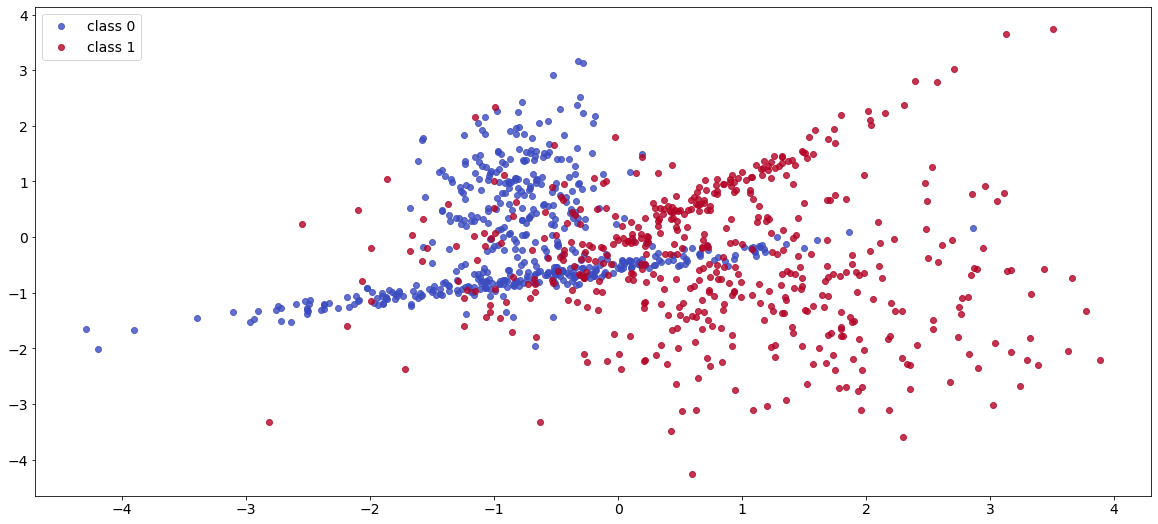

In [19]:
cm = plt.cm.get_cmap('coolwarm', len(np.unique(labels)))

labels_0_idx = np.where(y == 0)[0]
labels_1_idx = np.where(y == 1)[0]

plt.scatter(X[labels_0_idx,0], X[labels_0_idx,1], alpha=0.8, label='class 0', c=np.array([cm(0)]))
plt.scatter(X[labels_1_idx,0], X[labels_1_idx,1], alpha=0.8, label='class 1', c=np.array([cm(1)]))
plt.legend()
plt.show()

In [20]:
net = NeuralNetwork(X, y, lr=0.001)

iterations = 5000
net.fit(iterations=iterations, print_error=False)

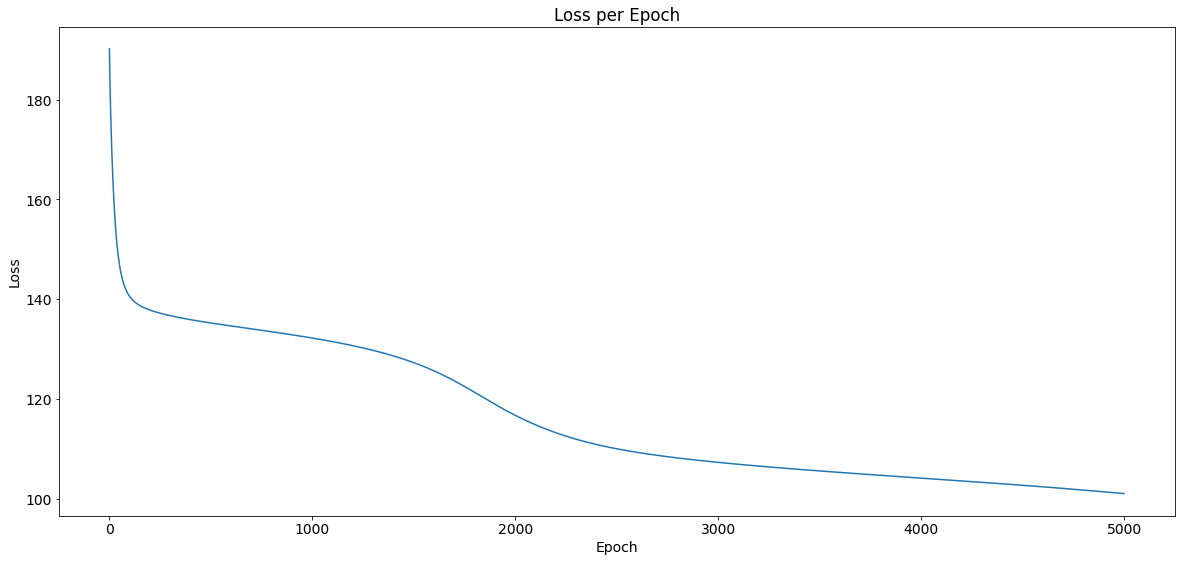

In [21]:
plt.plot(range(0, iterations), net.loss)
plt.title('Loss per Epoch')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

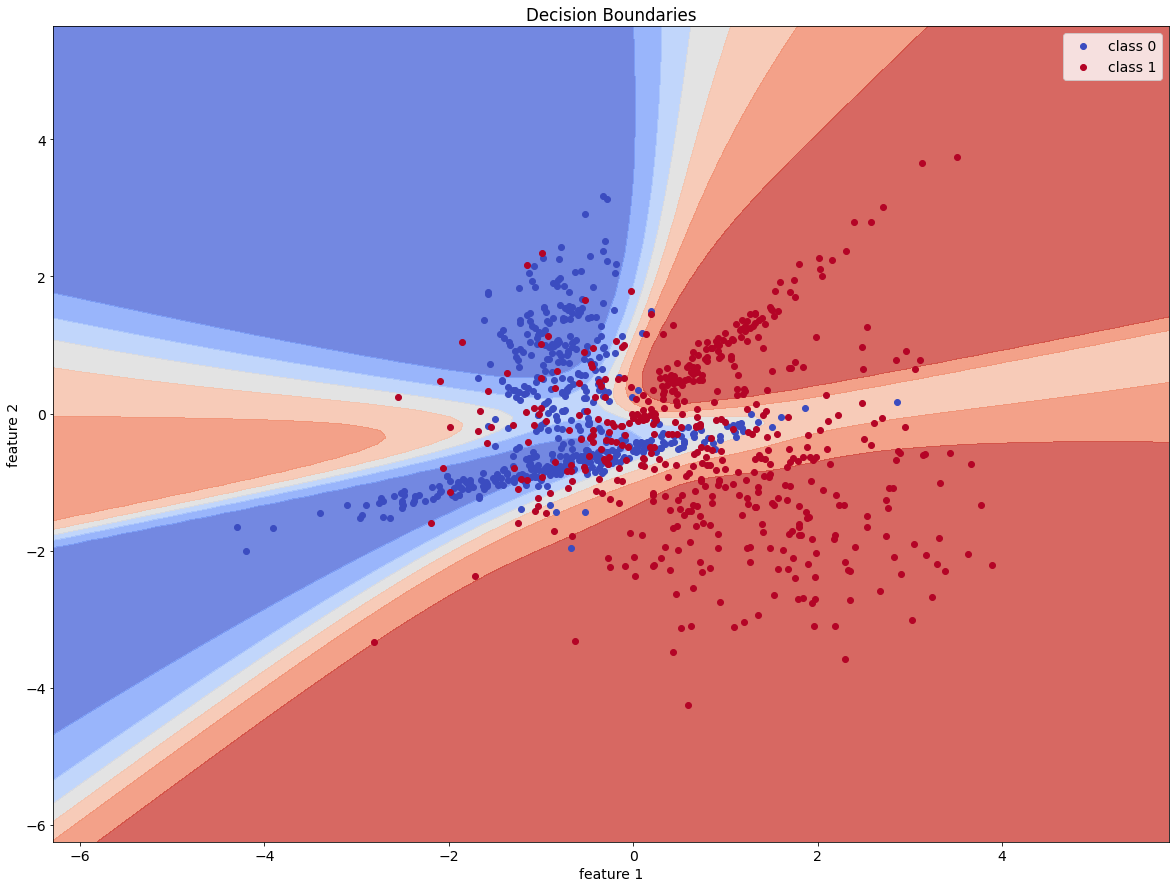

In [22]:
create_plot(X, y, net, title='Decision Boundaries', alpha=0.8, colormap='coolwarm', plot_data_points=True,
            label_feature_1='feature 1', label_feature_2='feature 2')

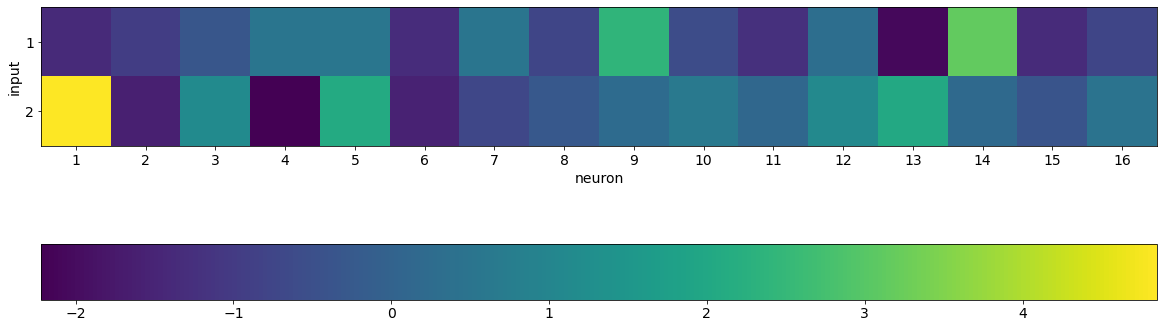

In [23]:
fig, ax = plt.subplots()
im = ax.imshow(net.weights_1)
ax.set_xlabel("neuron")
ax.set_yticks([0, 1])
ax.set_xticks(list(range(0, net.weights_1.shape[1])))
ax.set_xticklabels(list(range(1, net.weights_1.shape[1] + 1)))
ax.set_yticklabels([1, 2])
ax.set_ylabel("input")

fig.colorbar(im, orientation="horizontal", pad=0.2)
plt.show()

In [24]:
X, y = make_moons(n_samples=400,noise = 0.04,random_state=random_state)

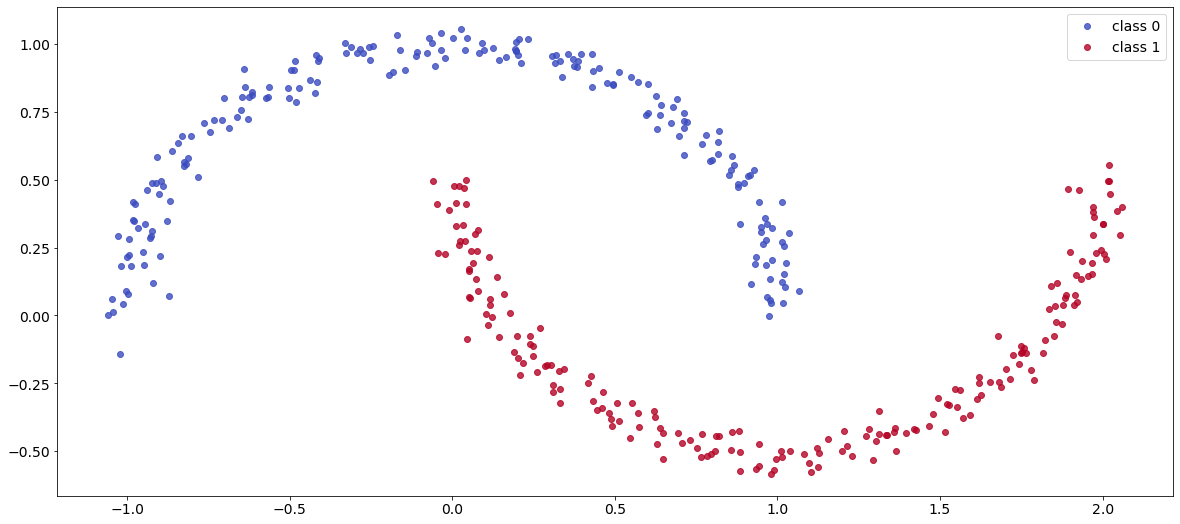

In [25]:
cm = plt.cm.get_cmap('coolwarm', len(np.unique(labels)))

labels_0_idx = np.where(y == 0)[0]
labels_1_idx = np.where(y == 1)[0]

plt.scatter(X[labels_0_idx,0], X[labels_0_idx,1], alpha=0.8, label='class 0', c=np.array([cm(0)]))
plt.scatter(X[labels_1_idx,0], X[labels_1_idx,1], alpha=0.8, label='class 1', c=np.array([cm(1)]))
plt.legend()
plt.show()

In [26]:
net = NeuralNetwork(X, y, lr=0.001)

iterations = 5000
net.fit(iterations=iterations, print_error=False)

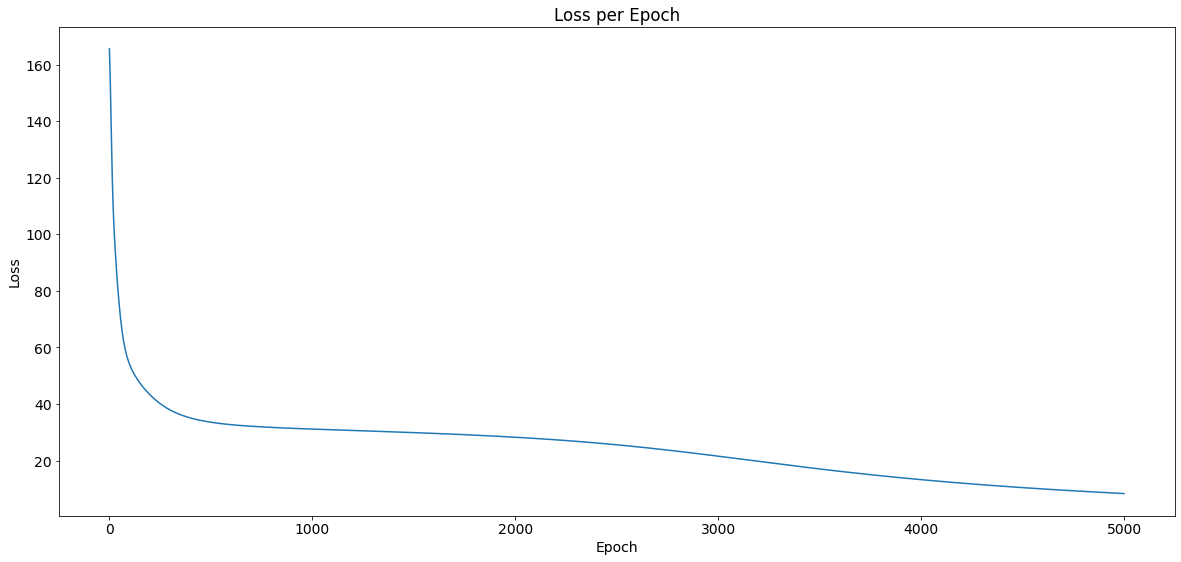

In [27]:
plt.plot(range(0, iterations), net.loss)
plt.title('Loss per Epoch')
plt.ylabel('Loss')
plt.xlabel('Epoch')

plt.show()

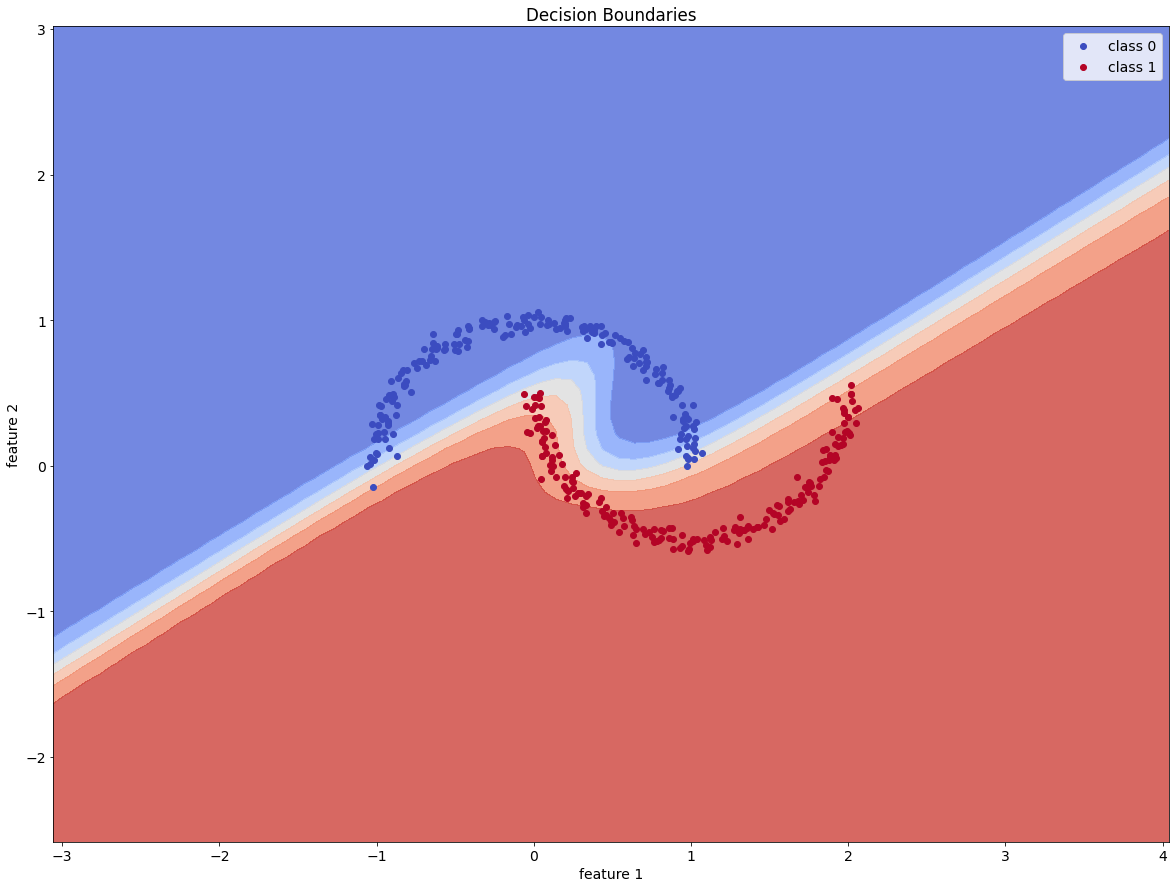

In [28]:
create_plot(X, y, net, title='Decision Boundaries', alpha=0.8, colormap='coolwarm', plot_data_points=True,
            label_feature_1='feature 1', label_feature_2='feature 2')

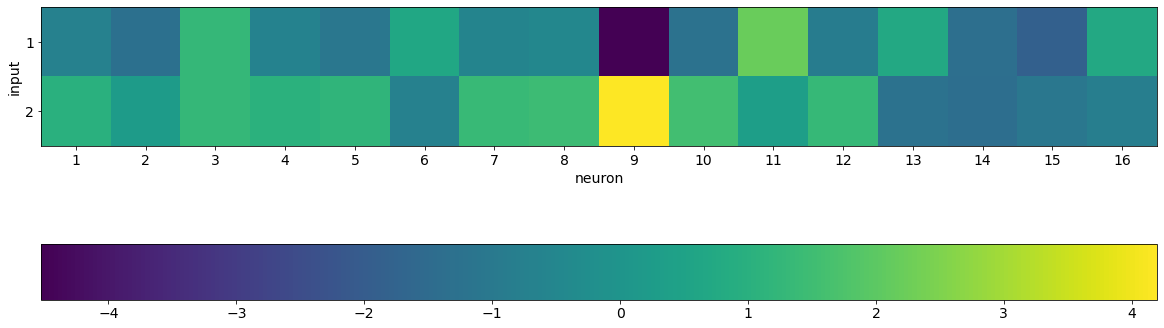

In [29]:
fig, ax = plt.subplots()
im = ax.imshow(net.weights_1)
ax.set_xlabel("neuron")
ax.set_yticks([0, 1])
ax.set_xticks(list(range(0, net.weights_1.shape[1])))
ax.set_xticklabels(list(range(1, net.weights_1.shape[1] + 1)))
ax.set_yticklabels([1, 2])
ax.set_ylabel("input")

fig.colorbar(im, orientation="horizontal", pad=0.2)
plt.show()